<a href="https://colab.research.google.com/github/Papa-Panda/kalman_filter/blob/main/KalmanFilterExample1_1_Independent_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
class KalmanFilter:
    """
    A simple Kalman filter implementation.
    Assumes a process with additive white Gaussian noise and attempts to estimate
    the state of the process using noisy measurements.
    Generated by chatGPT.
    Parameters
    ----------
    process_variance : float
        The variance of the process noise. Controls the trade-off between trusting
        the process model and the measurements.
    estimated_measurement_variance : float
        The variance of the measurement noise. Controls the trade-off between trusting
        the process model and the measurements.
    Equations:
    ----------
    Main update equation
    # Xk = Kk Zk + (1 - Kk) X{k-1}
    # X_k^{\hat} = K_k * Z_k + (1 - K_k) * X_{k-1}^{\hat}
    Assumption + prediction
    # Xk = A X{k-1} + B uk + w{k-1}
    # zk = H xk + vk
    Prediction
    Xk- = A X{k-1} + B uk
    Pk- = A P{k-1} AT + Q
    Update
    Kk = Pk- HT(H Pk- HT + R)^-1
    xk = (1 - Kk H ) Xk + Kk zk
    Pk = (1-Kk H) Pk-
    Example
    ----------
        # Create a Kalman filter with some process variance and some estimated measurement variance
        kalman_filter = KalmanFilter(1, 1)
        # Provide an initial estimate of the process state
        kalman_filter.input_latest_noisy_measurement(5)
        # Get the current estimate of the process state
        estimate = kalman_filter.get_latest_estimated_measurement()
        print(estimate)  # Output: 5
        # Input a new measurement
        kalman_filter.input_latest_noisy_measurement(10)
        # Get the updated estimate of the process state
        estimate = kalman_filter.get_latest_estimated_measurement()
        print(estimate)  # Output: something close to 7.5
    """
    
    def __init__(
        self,
        process_variance,
        estimated_measurement_variance,
        posteri_estimate=0.0,
        posteri_error_estimate=1.0,
    ):
        self.process_variance = process_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = posteri_estimate
        self.posteri_error_estimate = posteri_error_estimate

    def input_latest_noisy_measurement(self, measurement):
        """
        Update the estimate of the process state based on the latest measurement.
        
        Parameters
        ----------
        measurement : float
            The latest measurement of the process state.
        """
        priori_estimate = self.posteri_estimate
        priori_error_estimate = self.posteri_error_estimate + self.process_variance
        
        print('Prediction')
        print(round(priori_estimate,3), round(priori_error_estimate,3))

        blending_factor = priori_error_estimate / (
            priori_error_estimate + self.estimated_measurement_variance
        )
        self.posteri_estimate = priori_estimate + blending_factor * (
            measurement - priori_estimate
        )
        self.posteri_error_estimate = (1 - blending_factor) * priori_error_estimate

        print('Update')
        print(round(self.posteri_estimate,3), round(self.posteri_error_estimate,3))

    def get_latest_estimated_measurement(self):
        """
        Return the current estimate of the process state.
        
        Returns
        -------
        float
            The current estimate of the process state.
        """
        return self.posteri_estimate
    
    def get_latest_estiamted_error(self):
        """
        Return the current estimate error of the process state.
        
        Returns
        -------
        float
            The current estimate error of the process state.
        """
        return self.posteri_error_estimate

In [ ]:
"""
Mr Kalman Son is currently involved with a research for 
"""

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(20,5), 'figure.dpi':120})


In [44]:
process_variance = 0.0 # Q 
estimated_measurement_variance = 4 # R
posteri_estimate=14.0 # x0-
posteri_error_estimate=6.0 #P-


In [56]:
np.random.seed(0)
measurement_list = np.random.normal(loc = 14.4, scale = 4, size =100).tolist()

Prediction
14.0 6.0
Update
18.474 2.4
Prediction
18.474 2.4
Update
17.546 1.5
Prediction
17.546 1.5
Update
17.756 1.091
Prediction
17.756 1.091
Update
18.958 0.857
Prediction
18.958 0.857
Update
19.472 0.706
Prediction
19.472 0.706
Update
18.124 0.6
Prediction
18.124 0.6
Update
18.134 0.522
Prediction
18.134 0.522
Update
17.634 0.462
Prediction
17.634 0.462
Update
17.256 0.414
Prediction
17.256 0.414
Update
17.143 0.375
Prediction
17.143 0.375
Update
16.957 0.343
Prediction
16.957 0.343
Update
17.214 0.316
Prediction
17.214 0.316
Update
17.231 0.293
Prediction
17.231 0.293
Update
17.071 0.273
Prediction
17.071 0.273
Update
17.014 0.255
Prediction
17.014 0.255
Update
16.937 0.24
Prediction
16.937 0.24
Update
17.132 0.226
Prediction
17.132 0.226
Update
16.942 0.214
Prediction
16.942 0.214
Update
16.876 0.203
Prediction
16.876 0.203
Update
16.591 0.194
Prediction
16.591 0.194
Update
16.019 0.185
Prediction
16.019 0.185
Update
16.062 0.176
Prediction
16.062 0.176
Update
16.138 0.169
Predic

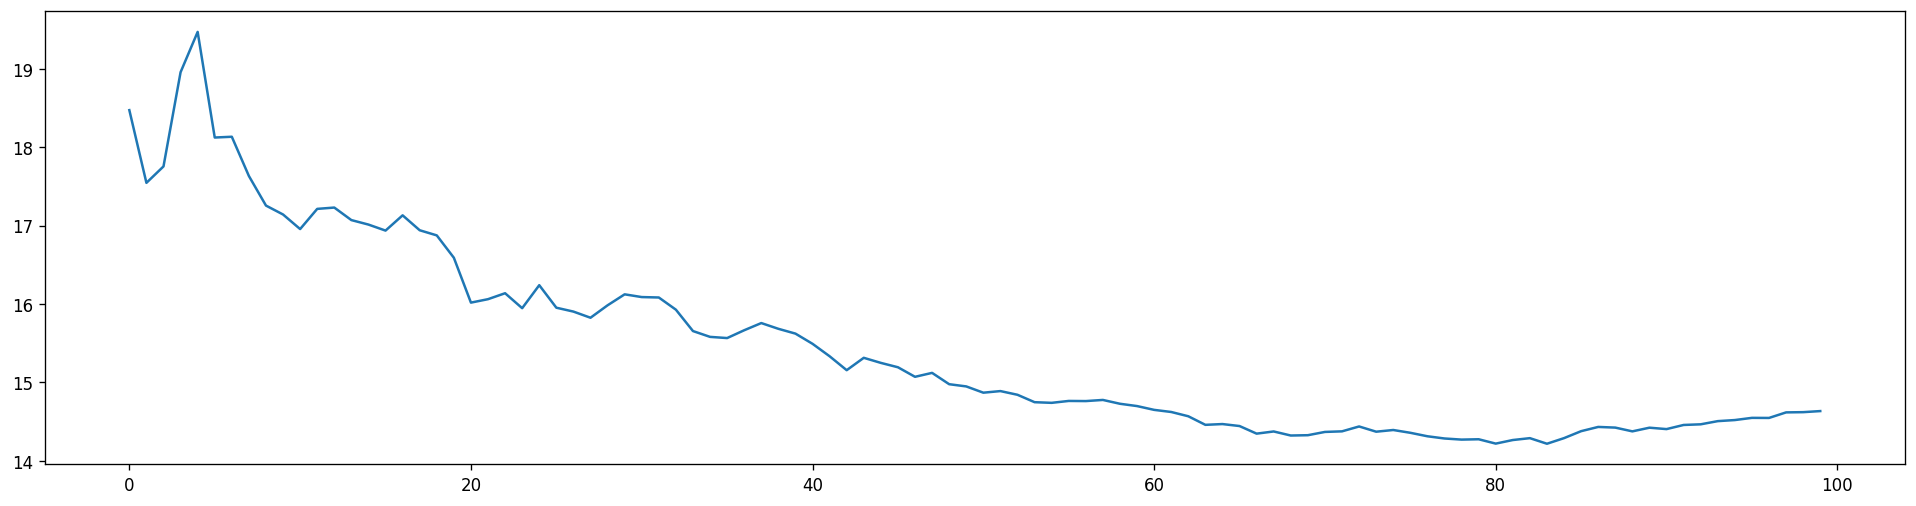

In [62]:
mean_list = []
error_list = []

for z in measurement_list:
  filter = KalmanFilter(        
          process_variance,
          estimated_measurement_variance,
          posteri_estimate,
          posteri_error_estimate,
  )
  filter.input_latest_noisy_measurement(z)
  posteri_estimate = filter.get_latest_estimated_measurement()
  posteri_error_estimate = filter.get_latest_estiamted_error()
  mean_list.append(posteri_estimate)
  error_list.append(posteri_error_estimate)

plt.plot(mean_list)
# plt.plot(error_list)

In [65]:
# plt.plot(measurement_list)
# plt.plot(error_list)

In [68]:
np.mean(measurement_list)

14.639232062137937